# Thématique : la Colonisation

## Nous avons télécharger sur CAMille-ULB les journaux du journal "Le soir" avec la requête ("La Colonisation"~4)

## Tous outils à importer

In [1]:
import os
import PyPDF2


# d'autres importation

from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

# Le reste des imports

import sys
from nltk.tokenize import sent_tokenize

import yake
from collections import defaultdict
import spacy
from spacy.lang.fr.examples import sentences
from collections import defaultdict

%pip install  fr_core_news_md


# Analyse de sentiment

from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline


# classification

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import seaborn as sn
from pprint import pprint
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix
import pandas as pd
import re
import operator


[nltk_data] Downloading package stopwords to /home/boy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Note: you may need to restart the kernel to use updated packages.


## Vérifions  d'abord si tous nos fichiers sont en extension TXT

In [3]:

txt_path = '../data/txt'

txts = []
for f in os.listdir(txt_path):
    if os.path.isfile(os.path.join(txt_path, f)):
        txts.append(f)
len(txts)

983

In [3]:
#  Lister les fichiers pdf qui n'ont pas encore été convertis en txt
not_converted_pdfs = []
for pdf in txts:
    file_name = os.path.splitext(pdf)[0]
    if file_name.endswith(".pdf") :
        not_converted_pdfs.append(pdf)
len(not_converted_pdfs)
print(not_converted_pdfs)

[]


In [4]:
!cat ../data/txt/*.txt > ../data/Tout.txt

In [5]:
with open("../data/Tout.txt", "w", encoding="utf-8") as output_file:
    for file in os.listdir(txt_path):
        if file.endswith(".txt"):
            with open(os.path.join(txt_path, file), "r", encoding="utf-8") as f:
                output_file.write(f.read())


In [6]:
!wc ../data/Tout.txt


       0  6173320 37339845 ../data/Tout.txt


# Analalyse de la distribution du vocabulaire

## Créer une une liste de stopwords

In [6]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "très", "francs", "rue", "grand", "ord"]
sw = set(sw)

print(f"{len(sw)} stopwords:\n {sorted(sw)}")

202 stopwords:
 ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'francs', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'grand', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mon', 'même

In [7]:
# Récupération du contenu du fichier
path = "../data/Tout.txt"
limit = 10**8

with open(path, 'r', encoding='utf-8') as f:
    text = f.read()[:limit]


# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

9125359 words found


## Calculer la taille du vocabulaire

In [9]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")


2784527 words kept (364377 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

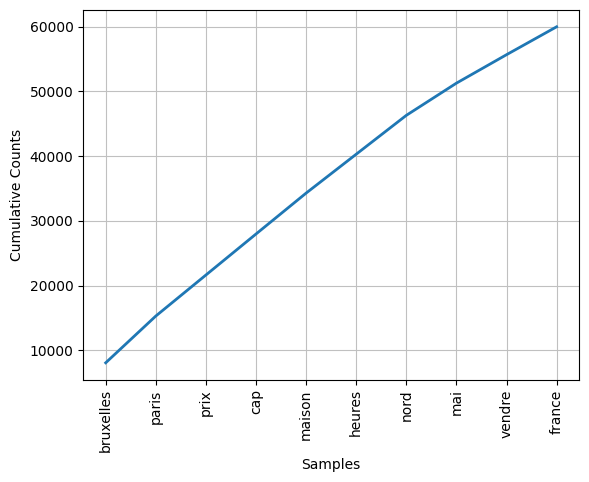

In [7]:
fdist = nltk.FreqDist(kept)
fdist.most_common(10)

# Plot: les n mots les plus fréquents
n = 10
fdist.plot(n, cumulative=True)

## Détecter les Hapax (mots qui n'apparaissent qu'une fois dans le corpus)

In [8]:
fdist.hapaxes()[:30]

['sarblc',
 'brùxellt',
 'parisiels',
 'iflfr',
 'lukubdubfilsr',
 'efuigeb',
 'lirmtionaii',
 'oiiln',
 'rvîî',
 'tfllltifws',
 'cossebvahok',
 'peogeîs',
 'soot',
 'fagencre',
 'ditœar',
 'rokirn',
 'mnuui',
 'baasenstciu',
 'tjjnew',
 'rros',
 'attribuéèparles',
 'oootipeht',
 'sétbie',
 'tribués',
 'confir',
 'agipil',
 'drfs',
 'élaboratioh',
 'suscita',
 'erenthal']

## Trouver les mots les plus longs du corpus

In [9]:
n = 30
sorted(voc, key=len, reverse=True)[:n]

['iiiiiiiiijiiiiiiiiiiiiiiiiiiiiitiiiiiiiiuiiiiiiiiiiitiiiiiiuiiiiiiiiiiiiiiiii',
 'iiinniiiiiiiniiimiiiiniiiniiiiiniiiiiiiiiiiiiiiiiiiiiiiiimi',
 'aaaaaaaaaaaaaaaaaaaaaaaaawaaaawaaaaaaaaaaaaaaaaaaaaaaaaaà',
 'reconstituantàbaseiievlngenereuxetdequinquin',
 'regonstitufintàbasedsvingênéreuxrtdbquinqdis',
 'aamaaaaiauaaaaaaaaaaaaaaaajaaaaaaaaaaaabaaaa',
 'reconstituantàbasedevingénereuxetdequinquin',
 'reconstituantèbasedevingenereuxetdequinquin',
 'recqnstituantàbasedevingënereuxetdequinquin',
 'reconstituântàbâsedavikqënereuxetdequsnquin',
 'reconstituantàbasedevingênëreuxetdequinquin',
 'recqnstituantâbasedeyinqênëreuxetdequinquin',
 'beconstituantàbasejevingénereuxetdequinquin',
 'reconstituantàbasedevingenereuxetdequinquin',
 'reconstituantàbaselevingenereuxetdaquinquin',
 'reconstituântàbasedevingénereuxetnequinquin',
 'reconstituantàbasedevingénereuxetdequinpin',
 'laplusimpwtanlomalsoiitlrroslerstluhoiiùe',
 'iisivenamimportebiffsnmnjwutellbdonffliw',
 'uplûsiniportantemaiflonua

## Extraction des mots clés avec Yake

In [13]:

# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor


for f in sorted(txts)[:10]:
    text = open(os.path.join(txt_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB555_1913-01-01_01-00005.txt mentions these keywords: d'une valeur, crédit mutuel, Marché calme, Indépendance belge, Caisse centrale, Autriche Rente, petit producteur, Autriche Crédit, Schulze Delitzseh...
KB_JB555_1913-01-02_01-00002.txt mentions these keywords: VON KIDERLEN-WAECHTER, von Kiderlen, von Schoen, nouveau cabinet, von Holstein, Roi qu'il, oomte Romanonès, von Bethmann-Hollweg...
KB_JB555_1913-01-05_01-00005.txt mentions these keywords: Bourse fermée, Marché calme, LONDRES Comptant, Marché ferme, cours jours, Indépendance neige, Autriche Rente...
KB_JB555_1913-01-05_01-00006.txt mentions these keywords: BELLE MAISON, avenue Louise, vendre belle, notaires Van, francs l'an...
KB_JB555_1913-01-06_01-00006.txt mentions these keywords: Fin déc, déc Fin, Crédit Anversois, Pin déc, Rente belge, capital Fin, Bruxelles Banque...
KB_JB555_1913-01-07_01-00001.txt mentions these keywords: IstO Genxiiaesl, ministres turc, congrégations religieuses, grandes puissances, plénipotentia

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

In [9]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

983

In [10]:
year = 1915


# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))


# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"I* £N BELGIQUE ET A PARIS 84- ANNEE Vendredi 26 septembre 1M3 ADMINISTRATION ET RÉDACTION 1 ï» ruo «I«mi Sarblc»»» Brùxellt-s*» BUREAUX PARISIElS : 11, place de la Bourse ABONNEMENTS: '■■ ÉDITION QUOTIDIENNE BELGIQUE. Ub », 20 fr. E mois. Iflfr. 3 mois, 5 fr. LUKUBDUBfilSr.-DJ 28 îr » 15 fr. » 8 fr. EfUIGEB > 40 fr. 22 fr. » 12 ir. ÉDITION HEBDOMADAIRE 'It-lirmtionaii et d'Oiiln-merl 10 PAGES, PARAISSANT LE MERCREDI Un tan ,... v rVîî fran<» Six mol» ii; franc-» K» nom Vendredi 26 septembre 1913"

## La fonction de nettoyage

In [11]:

def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur notre fichier coloni

In [12]:
clean_text(year, folder=temp_path)

# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'BELGIQUE PARIS ANNEE VENDREDI SEPTEMBRE ADMINISTRATION RÉDACTION RUO SARBLC BRÙXELLT BUREAUX PARISIELS PLACE BOURSE ABONNEMENTS ÉDITION QUOTIDIENNE BELGIQUE MOIS IFLFR MOIS LUKUBDUBFILSR EFUIGEB ÉDITION HEBDOMADAIRE LIRMTIONAII OIILN MERL PAGES PARAISSANT MERCREDI TAN RVÎÎ FRAN SIX MOL FRANC NOM VENDREDI SEPTEMBRE MOIS TFLLLTIFWS EAS JOEB COSSEBVAHOK SAS PEOGEÎS ÉDITION SOIR ANNONCES REÇUES BRUXELLES BUREAU JOU ANL PARIS PLACE BOURSE NUB CHEI MIL JOHN JONES SOOT BILL FAGENCRE HARAS CHEAP IDE OBÉ'

### Afficher les termes les plus fréquents après nettoyage


In [13]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('BRUXELLES', 8070), ('PARIS', 7226), ('PRIX', 6338), ('CAP', 6337), ('MAISON', 6319), ('HEURES', 6010), ('NORD', 6003), ('MAI', 4976), ('VENDRE', 4396), ('FRANCE', 4312)]


### Créer, stocker et afficher le nuage de mots

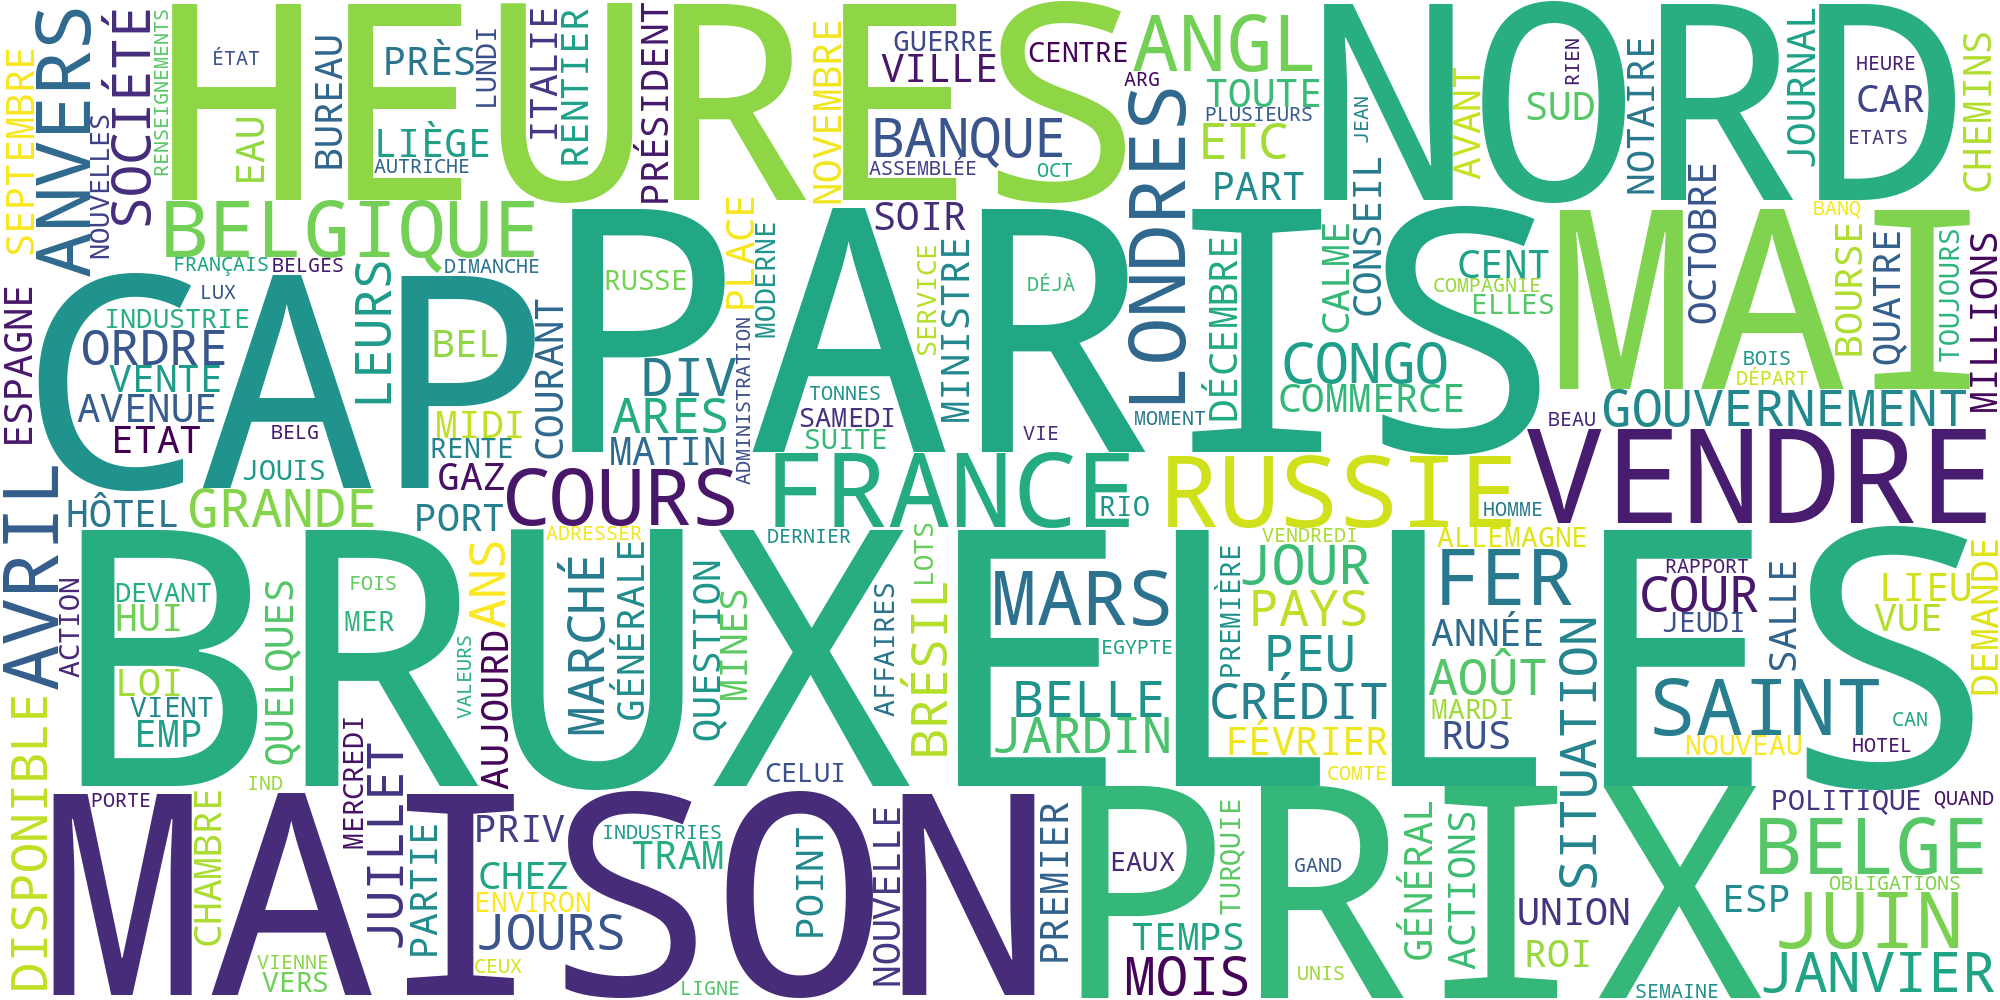

In [18]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

# La reconnaissance d'entités nommées sur notre corpus

In [ ]:
#import ipykernel

# Charger le texte
n=1000000
text = open("../data/Tout.txt", encoding='utf-8').read()[:n]


nlp = spacy.load('fr_core_news_md')


#%%time
# Traiter le texte

doc = nlp(text)

# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1


# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

# Segmentation en phrases

In [2]:
infile = "../data/tmp/1914_clean.txt"
outfile = "../data/sents_Netto.txt"

In [3]:
LIMIT = None

with open(outfile, 'w', encoding="utf-8") as output:
    with open(infile, encoding="utf-8", errors="backslashreplace") as f:
        content = f.readlines()
        content = content[:LIMIT] if LIMIT is not None else content
        n_lines = len(content)
        for i, line in enumerate(content):
            if i % 100 == 0:
                print(f'processing line {i}/{n_lines}')
            sentences = sent_tokenize(line)
            for sent in sentences:
                output.write(sent + "\n")
print("Done")

processing line 0/1
Done


# Analyse de sentiment

## Définition d'un fonction

In [4]:
# Segmentation des contenus des fichiers 

def lire_fichiers_txt(dossier):
    corpus = []
    for nom_fichier in os.listdir(dossier):
        if nom_fichier.endswith('.txt'):
            chemin_fichier = os.path.join(dossier, nom_fichier)
            with open(chemin_fichier, 'r', encoding='utf-8') as fichier:
                contenu = fichier.read()
                corpus.append(contenu)
    return corpus


In [5]:
def analyser_sentiments(corpus):
    sentiments = []
    for texte in corpus:
        blob = TextBlob(texte)
        sentiments.append({'texte': texte, 'polarité': blob.sentiment.polarity, 'subjectivité': blob.sentiment.subjectivity})
    return sentiments


In [6]:
corpus = lire_fichiers_txt(txt_path)

len(corpus)

983

In [9]:
# Utilisation
resultats_sentiment = analyser_sentiments(corpus)

for resultat in resultats_sentiment:
    print(f'Texte: {resultat["texte"][:50]}... | Polarité: {resultat["polarité"]}, Subjectivité: {resultat["subjectivité"]}')



Texte: I* £N BELGIQUE ET A PARIS 84- ANNEE Vendredi 26 se... | Polarité: -0.008920599489795915, Subjectivité: 0.4319302721088435
Texte: 14 O Oô33Lifeiïii4e»1 et* éeloiquc et a paris ; ; ... | Polarité: 0.10173160173160171, Subjectivité: 0.6343614718614718
Texte: L'INDEPENDANCE BELGE constate avec douleur que les... | Polarité: 0.1741992630385488, Subjectivité: 0.5675736961451247
Texte: L'INDEPENDANCE BELGE Lettre de (De notre correspon... | Polarité: 0.15103266609062982, Subjectivité: 0.5661290322580644
Texte: _______ LTNDEPENDANCE BELGE Commercé, Industrie, F... | Polarité: 0.15819258432539682, Subjectivité: 0.4407142857142858
Texte: L'INDEPENDANCE BELGE ciper i\ la délégation des ga... | Polarité: 0.014710884353741504, Subjectivité: 0.5368622448979592
Texte: ET_l_rLVEND_Oît__ SEI.--! T~\*S " DB NOS COSSESPON... | Polarité: 0.10833826927576928, Subjectivité: 0.43029718029718034
Texte: B !_..____> G enti___iésl C_ ____!_.- ST A . AFJÎ ... | Polarité: 0.23088553603259485, Subjectivité: 

# Classification de documents supervisé

In [8]:
# Supposons que vous ayez des étiquettes pour chaque texte
# etiquettes = ['positif', 'négatif', 'neutre'] * (len(corpus) // 3)  # Exemple d'étiquettes

# Nettoyage des textes
texts = [re.sub('[^a-z]+', ' ', t.lower()).strip() for t in corpus]


n = (len(texts) // 3) * 3
corpus = texts[:n]
etiquettes = ['positif', 'négatif', 'neutre'] * (n // 3)


# Transformez le texte en vecteurs
X_train, X_test, y_train, y_test = train_test_split(corpus, etiquettes, test_size=0.2, random_state=42)

pipeline = make_pipeline(CountVectorizer(), SVC(kernel='linear'))

# Entraînez le modèle
pipeline.fit(X_train, y_train)

# Prédisez les classes sur le jeu de test
predictions = pipeline.predict(X_test)

# Affichez les résultats
for texte, prediction in zip(X_test, predictions):
    print(f'Texte: {texte[:50]}... | Prédiction : {prediction}')


Texte: in venaa nce belge commerce industrie finance de n... | Prédiction : positif
Texte: t vtd xos sc belt soimeree industrie mm de nos cor... | Prédiction : négatif
Texte: u inutttiwuanut hioioui v mtoti i fc lndepl danct ... | Prédiction : neutre
Texte: atnce bel g e avis de soci t s luterma belge soci ... | Prédiction : négatif
Texte: en belslque et a paris anneb samedi novembre admin... | Prédiction : positif
Texte: p cli par le ciiemip de fer wagons charg s de houi... | Prédiction : neutre
Texte: s est termin heures duvignon a persist dans son sy... | Prédiction : neutre
Texte: j o e i l efel cn beleiq e et a paris ann e vendre... | Prédiction : neutre
Texte: mm nnu ept v j iw e ui lsk t uys et c e anvers rot... | Prédiction : neutre
Texte: l independance belge commerce industrie finattce d... | Prédiction : neutre
Texte: l independance belge de nos correspondants revue m... | Prédiction : négatif
Texte: soei t m tallurgique russo belge mm les acttoii ii... | Prédiction : neutre

In [ ]:
# Nettoyage des textes
texts = [re.sub('[^a-z]+', ' ', t.lower()).strip() for t in corpus]


# Mapping des targets
targets = np.array([labels[t] for t in corpus])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(texts, targets, test_size=0.2, random_state=11)

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

### Entrainer un modèle de machine learning sur les données d'entrainement

In [ ]:
# Définition du type de modèle
classifier = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'), min_df=50, max_df=0.5)),
    ('classifier', MultinomialNB()),
])

# Entrainement du modèle
classifier.fit(X_train, y_train)

#### Le TFIDF calcule le score IDF de chaque mot du corpus


In [ ]:
feature_names = classifier.named_steps['vectorizer'].get_feature_names_out()
idf_scores = classifier.named_steps['vectorizer'].idf_


# Taille du vocabulaire
len(feature_names)

# Score IDF de chaque terme du vocabulaire
for i in range(0, 10):
    print(feature_names[i], ':', round(idf_scores[i], 2))



In [ ]:
# Les 10 mots avec le score IDF le plus haut
for word, score in sorted(zip(feature_names, idf_scores), key=operator.itemgetter(1), reverse=True)[:20]:
    print(word, round(score, 2))

#### Le TF-IDF transforme chaque document en vecteur de la taille du vocabulaire et donc le score est le TFIDF (fréquence du terme dans le document * idf)

In [ ]:
tmp = classifier.named_steps['vectorizer'].transform(X_train[:10])
pd.DataFrame(tmp.toarray(), columns=classifier.named_steps['vectorizer'].get_feature_names_out())

#### Le modèle naïf bayésien apprend la corrélation entre chaque mot et chaque catégorie

In [ ]:
pd.DataFrame(classifier.named_steps['classifier'].feature_log_prob_, index=labels, columns=feature_names).T

#### On peut ainsi découvrir les termes les plus contributifs pour un label donné

In [ ]:
pd.DataFrame(classifier.named_steps['classifier'].feature_log_prob_, index=labels, columns=feature_names).T.sort_values(by='comp.graphics', ascending=False).head(20)

### Prédire les targets des données de test à l'aide du modèle entrainé

In [ ]:
y_pred = classifier.predict(X_test)

Aperçu des targets prédites

In [ ]:
y_pred[:20]

Aperçu des targets réelles

In [ ]:
y_test[:20]

### Evaluer le modèle

In [ ]:
# Générer un rapport de classification

print(classification_report(y_test, y_pred))

In [ ]:
# Générer une matrice de confusion

plot_confusion_matrix(y_test, y_pred, figsize=(10, 10), labels=labels, x_tick_rotation=90)